In [1]:
#--------------Importing Libraries--------------#
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from IPython.display import display
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import mixture
from scipy.misc import comb

In [5]:
#---------------Defining Function--------------#
def misclassification_rate(y,y_estimated):
    count=0
    for i in range(len(y)):
        if y_estimated[i]!= y[i]:
            count= count+1
    miscl_rate = count/len(y)*100
    return miscl_rate

def get_rand_index(clusters, classes):
    t_fp = comb(np.bincount(clusters), 2).sum()
    t_fn = comb(np.bincount(classes), 2).sum()
    P = np.c_[(clusters, classes)]
    tp = sum(comb(np.bincount(P[P[:, 0] == i, 1]), 2).sum()
             for i in set(clusters))
    fp = t_fp - tp
    fn = t_fn - tp
    tn = comb(len(P), 2) - tp - fp - fn
    return (tp + tn) / (tp + fp + fn + tn)


In [6]:
#--------------Reading Dataset-----------------#
df = pd.read_csv("perfume-data.txt")
print("Size of Original Dataset")
print(df.shape)

#removing outliers from the dataset
from scipy import stats
z = np.abs(stats.zscore(df))

df_pre_1 = df[(z < 1.9).all(axis=1)]
print("Size of Dataset after removing outliers")
print(df_pre_1.shape)


X= df.drop(['Var2'], axis=1) 
Y= df['Var2']


'''
#visualizing the boxplot to find the outliers
import seaborn as sns
sns.boxplot(x=df_pre_1['Var1'])
'''

#Dataset 4 Splitting
train, test = train_test_split(df, test_size=0.20, random_state=42)
X_train = train.drop(['Var2'], axis=1)  
y_train = train['Var2']
X_test = test.drop(['Var2'], axis=1)  
y_test = test['Var2']
#print(y_test.shape)

print('---------------------------------')
print('')
#implementing KNN 
k_list=range (2,20,2)
knn_rand_index_list=[]
knn_adj_rand_index_list=[]
accuracy_result_list=[]
for k in k_list:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    y_pred=knn_clf.predict(X_test)
    rand_index = get_rand_index(y_test, y_pred) 
    knn_rand_index_list.append(rand_index)
    adj_rand_index = metrics.adjusted_rand_score(y_test, y_pred) 
    knn_adj_rand_index_list.append(adj_rand_index)
    accuracy_result= accuracy_score(y_test, y_pred)
    accuracy_result_list.append(accuracy_result)

print('adj_rand_index_list For KNN')
print(knn_adj_rand_index_list)
print('Rand Index for KNN')
print(knn_rand_index_list)
print('---------------------------------')
print('')

#Implementing GMM

#k_list=[20]
k_list=range (2,20,2)
gmm_rand_index_list=[]
gmm_adj_rand_index_list=[]
accuracy_result_list=[]
for k in k_list:
    gmm_clf = mixture.GaussianMixture(n_components =k, max_iter=1000)
    gmm_clf.fit(X)
    y_pred=gmm_clf.predict(X)
    #print(y_pred)
    rand_index = get_rand_index(Y, y_pred) 
    gmm_rand_index_list.append(rand_index)
    adj_rand_index = metrics.adjusted_rand_score(Y, y_pred) 
    gmm_adj_rand_index_list.append(adj_rand_index)
    accuracy_result= accuracy_score(Y, y_pred)
    accuracy_result_list.append(accuracy_result)

print('adj_rand_index_list For GMM')
print(gmm_adj_rand_index_list)
print('Rand Index For GMM')
print(gmm_rand_index_list)
print('---------------------------------')
print('')
#Implementing GMM, inirilizing with kmeans

#k_list=[20]
k_list=range (2,20,2)
rand_index_list=[]
adj_rand_index_list=[]
accuracy_result_list=[]
for k in k_list:
    gmm_clf = mixture.GaussianMixture(n_components =k, init_params='kmeans', max_iter =1000)
    gmm_clf.fit(X)
    y_pred=gmm_clf.predict(X)
    #print(y_pred)
    rand_index = get_rand_index(Y, y_pred) 
    rand_index_list.append(rand_index)
    adj_rand_index = metrics.adjusted_rand_score(Y, y_pred) 
    adj_rand_index_list.append(adj_rand_index)
    accuracy_result= accuracy_score(Y, y_pred)
    accuracy_result_list.append(accuracy_result)

print('adj_rand_index_list For GMM after initializing with kmeans')
print(adj_rand_index_list)
print('Rand Index For GMM')
print(rand_index_list)

print('---------------------------------')
print('')


Size of Original Dataset
(560, 2)
Size of Dataset after removing outliers
(504, 2)
---------------------------------

adj_rand_index_list For KNN
[0.9597864548466761, 0.9386116688619287, 0.9386116688619287, 0.911883781852822, 0.7876987370858688, 0.7876987370858688, 0.6738812031693943, 0.6547674535103042, 0.6277185583897891]
Rand Index for KNN
[0.9962998712998713, 0.9943693693693694, 0.9943693693693694, 0.991956241956242, 0.9803732303732303, 0.9803732303732303, 0.9689510939510939, 0.9671814671814671, 0.9642857142857143]
---------------------------------

adj_rand_index_list For GMM
[0.09431031080165922, 0.15722273553462762, 0.31961398613728503, 0.3767670645268412, 0.45291629964683466, 0.5305979919949717, 0.5795775495890673, 0.5973221557062984, 0.5982893012492367]
Rand Index For GMM
[0.5478660874009711, 0.6901162790697675, 0.8465180168668541, 0.8741949910554562, 0.9054114490161002, 0.9367940199335548, 0.9477255302836698, 0.9563442371581906, 0.956312292358804]
----------------------------

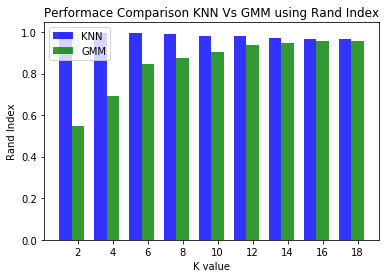

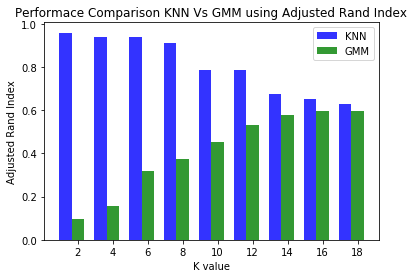

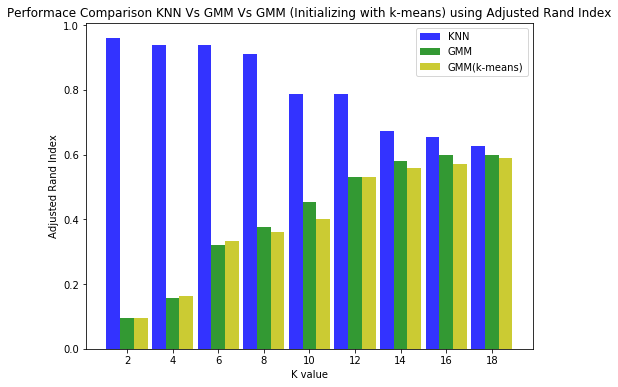

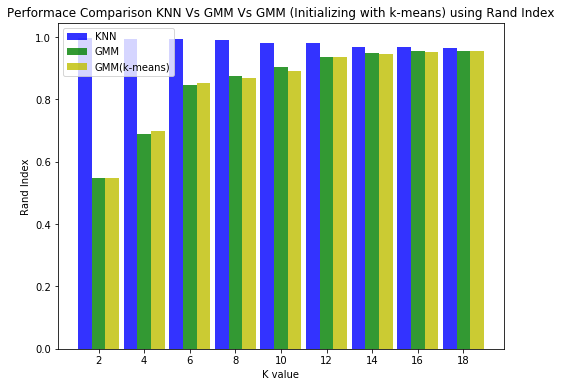

In [8]:
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure   
n_groups = 9
n=range(2,20,2)
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, knn_rand_index_list, bar_width,alpha=opacity, color='b', label='KNN')
rects2 = plt.bar(index + bar_width, gmm_rand_index_list, bar_width, alpha=opacity, color='g', label='GMM')

plt.xlabel('K value')
plt.ylabel('Rand Index')
plt.title('Performace Comparison KNN Vs GMM using Rand Index')
plt.xticks(index + bar_width, n)
plt.legend()
 
#plt.tight_layout()
plt.show()



n_groups = 9
n=range(2,20,2)
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, knn_adj_rand_index_list, bar_width,alpha=opacity, color='b', label='KNN')
rects2 = plt.bar(index + bar_width, gmm_adj_rand_index_list, bar_width, alpha=opacity, color='g', label='GMM')

plt.xlabel('K value')
plt.ylabel('Adjusted Rand Index')
plt.title('Performace Comparison KNN Vs GMM using Adjusted Rand Index')
plt.xticks(index + bar_width, n)
plt.legend()
 
#plt.tight_layout()
plt.show()



n_groups = 9
n=range(2,20,2)
fig, ax = plt.subplots(figsize=(8,6))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, knn_adj_rand_index_list, bar_width,alpha=opacity, color='b', label='KNN')
rects2 = plt.bar(index + bar_width, gmm_adj_rand_index_list, bar_width, alpha=opacity, color='g', label='GMM')
rects2 = plt.bar(index + bar_width+ bar_width, adj_rand_index_list, bar_width, alpha=opacity, color='y', label='GMM(k-means)')
plt.xlabel('K value')
plt.ylabel('Adjusted Rand Index')
plt.title('Performace Comparison KNN Vs GMM Vs GMM (Initializing with k-means) using Adjusted Rand Index')
plt.xticks(index + bar_width, n)
plt.legend()
 
#plt.tight_layout()
plt.show()


n_groups = 9
n=range(2,20,2)
fig, ax = plt.subplots(figsize=(8,6))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, knn_rand_index_list, bar_width,alpha=opacity, color='b', label='KNN')
rects2 = plt.bar(index + bar_width, gmm_rand_index_list, bar_width, alpha=opacity, color='g', label='GMM')
rects2 = plt.bar(index + bar_width+ bar_width, rand_index_list, bar_width, alpha=opacity, color='y', label='GMM(k-means)')
plt.xlabel('K value')
plt.ylabel('Rand Index')
plt.title('Performace Comparison KNN Vs GMM Vs GMM (Initializing with k-means) using Rand Index')
plt.xticks(index + bar_width, n)
plt.legend()
 
#plt.tight_layout()
plt.show()